# Projektarbeit - EMO1LU

## Total cost of ownership (TCO) - Total cost of ownership (TCO)



Simon Schalk
S1910632012


Datum: 11.02.2020


## Introduction/Einführung

In dieser Projektarbeit sollen die in der Lehrveranstaltung gelernten Methoden und Tools in *Jupyter* an einem eigenen, sinnvollen Projekt angewendet werden. Es geht vor allem darum, in *Jupyter* mit **Python** mit vorhandenen Daten zu arbeiten, diese aufzubereiten und mathematische Berechnungen anzustellen. Weiters sollen grafische Visualisierungen der Ergebnisse und interaktive Widgets verwendet werden.  

## Problembeschreibung 

Immer wenn es darum geht, über die Sinnhaftigkeit und die Vorteile der Elektromobilität im Individualverkehr zu diskutieren, werde ich mit den klassischen Gegenargumenten wie, zu wenig Reichweite, im Winter keine Performance, zu lange Ladezeiten etc. konfrontiert. Der mit Abstand wichtigste Punkt für die Menschen ist aber immer noch der Preis. Viele Menschen können sich nicht vorstellen, dass ein E-Auto, welches in der Anschaffung etwa 10.000 EURO teurer ist als ein vergleichbarer Verbrenner, im lauf eines Autolebens viel günstiger kommt.

Aus diesem Grund sollen in dieser Projektarbeit die betrieblichen Gesamtkosten von Elektro-Fahrzeugen und konventionellen Pkws verglichen werden. Es wird ein Betrachtungszeitraum von 10 Jahren angenommen. 


<img src="elektroauto-vs-benziner-im-vergleich.jpg" width=400 />

Verglichen werden dabei die ab Februar 2020 erhältlichen Kleinwagen Peugeot 208 in  Benziner- und Elektro-Variante.

## Methode 

### Allgemeine Fromel:

Wie in folgender Formel ersichtlich, berechnen sich die TCO aus der Summe der einmaligen Fixkosten und den jährlichen variablen Kosten für einen gewissen Zeitraum. 

$ TCO = c_f + \sum_{i=0}^{10} (c_F + c_M + c_I) $

- $c_f$........Fixcosts (einmalige Anschaffungskosten abzüglich Investitionsförderungen)

- $TCO$...Total Cost of Ownership (betriebliche Gesamtkosten) über bestimmten Zeitraum

- $c_F$........Costs of **F**uel (Treibstoffkosten)

- $c_M$.......Costs of **M**aintainance (Instandhaltungskosten)

- $c_I$.........Costs of Insurance (Versicherung, Steuern, Abgaben)

**Definition des Berechnungszeitraums in Jahren:**

In [118]:
jahre = 10

### Anschaffungskosten und Förderung (Fixkosten):


Der Peugeot 208-e GT (Elektro) kostet in der Topversion, ohne Zusatzpakete, 37.300€. 
Der Peugeot 208 GT PureTEch 130EAT8 (Benzin) kostet mit der gleichen Leistung und Topversion, ebenfalls ohne Zusatzpakete, 26.500€. 

Für den Kauf von Elektroautos gibt es aktuell bis zu 3.300 € Förderung von der Öffentlichen Hand. Diese können von den Anschaffungskosten des 208-e abgezogen werden.  

In [2]:
c0_e = 37300
cfoerder_e = 3300

c0_ver = 26500
cfoerder_ver = 0

print('Förderung:                          ', cfoerder_e, '€')
print('Anschaffungskosten 208-e (Elektro): ', c0_e, '€')
print('Anschaffungskosten 208 (Benziner):  ', c0_ver, '€')
print('')



cf_e = c0_e - cfoerder_e
cf_ver = c0_ver - cfoerder_ver

print('einmalige Fixkosten 208-e (Elektro):', cf_e, '€')
print('einmalige Fixkosten 208 (Benziner) :', cf_ver, '€')

Förderung:                           3300 €
Anschaffungskosten 208-e (Elektro):  37300 €
Anschaffungskosten 208 (Benziner):   26500 €

einmalige Fixkosten 208-e (Elektro): 34000 €
einmalige Fixkosten 208 (Benziner) : 26500 €


### Verbrauchsdaten (WLTP) laut Hersteller: 


In [3]:
WLTP_e = 14.7
WLTP_ver = 5.7

print('Verbrauch 208-e:', WLTP_e, 'kWh/100km')
print('Verbrauch 208:  ' , WLTP_ver, 'Liter/100km')

Verbrauch 208-e: 14.7 kWh/100km
Verbrauch 208:   5.7 Liter/100km


### Ermittlung der durchschnittlichen Benzinkosten:

Für die Bestimmung der durchschnittlichen Benzinkosten werden Daten der Jahre 2004 bis 2019 gemittelt und für die weiter Berechnung herangezogen. Diese Daten werden aus einer Excel-Datei importiert. 

Die importierten Daten sollen dann so aufbereitet werden, dass nur die Österreichischen Werte verwendet werden und daraus der Mittelwert gebildet wird. 

In [4]:
import pandas as pd

df = pd.read_excel("Benzin-Preise.xlsx", header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Preisvergleich einiger EU-Länder 2004 bis 2019...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Land,2004.00,2005.00,2007.00,2008.00,2009.00,2010.00,2011.00,2012.00,2013.00,2014.000,2015.00,2016.00,2017.00,2018.00,2019.00
2,Belgien,1.10,1.24,1.41,1.50,1.11,1.35,1.56,1.74,1.67,1.600,1.42,1.24,1.38,1.46,1.43
3,Dänemark,1.26,1.23,1.38,1.40,1.00,1.45,1.60,1.80,1.66,1.580,1.43,1.38,1.55,1.61,1.63
4,Deutschland,1.19,1.18,1.37,1.43,1.09,1.35,1.50,1.73,1.65,1.521,1.28,1.21,1.36,1.47,1.40
5,Frankreich,1.05,1.15,1.31,1.38,1.07,1.35,1.53,1.63,1.60,1.510,1.37,1.24,1.39,1.49,1.49
6,Italien,1.10,1.23,1.35,1.39,1.10,1.34,1.46,1.81,1.77,1.760,1.53,1.45,1.55,1.57,1.55
7,Luxemburg,0.92,0.99,1.18,1.19,0.91,1.13,1.25,1.42,1.37,1.290,1.16,1.01,1.14,1.19,1.18
8,Niederlande,1.26,1.33,1.51,1.56,1.25,1.54,1.66,1.83,1.83,1.770,1.65,1.46,1.65,1.72,1.72
9,Österreich,0.94,1.00,1.13,1.22,0.91,1.11,1.29,1.45,1.41,1.340,1.18,1.04,1.18,1.21,1.19


In [5]:
df1 = df.drop([0,2,3,4,5,6,7,8],axis =0)
df2 = df1.drop(df[df.index >9].index)
df3 = df2.T
df4 = df3.columns =["Jahr","Preis in €/Liter"]
df5 = df3.drop(df3.index[0])
df6 = df5.mean(axis=0)
df7 = df5.append(df6, ignore_index = True)
df7

Benzinkosten_Mittelwert = df7.loc[15,'Preis in €/Liter']
print('Durchschn. Benzinkosten =' , Benzinkosten_Mittelwert, '€/Liter')


Durchschn. Benzinkosten = 1.1733333333333333 €/Liter


### Individuelle Anpassung der Treibstoffkosten und Fahrleistung:

Hier soll der Nutzer die oben beschriebenen Faktoren (Treibstoff-, Wartungs- ind Versicherungskosten) selbst einstellen können. 
Falls man der Meinung ist, die durchschnittlichen Benzinkosten aus den Jahren 2004 bis 2019 stimmen nicht mehr, können auch diese hier individuell angepasst werden. Ansonsten wird automatisch mit den oben berechneten Durschschnittskosten gerechnet. 

In [6]:
import ipywidgets as widgets
from IPython.display import display

Fuel = widgets.FloatSlider(
    value=0.20,
    min=0.00,
    max=1.00,
    step=0.01,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    
)
print('Stromkosten in €/kWh:')
display(Fuel)

Fuel_ver = widgets.FloatSlider(
    value=Benzinkosten_Mittelwert,
    min=0.00,
    max=2.00,
    step=0.01,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    
)
print('Treibstoffkosten in €/Liter:')
display(Fuel_ver)



km = widgets.FloatSlider(
    value=15000,
    min=500,
    max=60000,
    step=500,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
    
)
print('Kilometer pro Jahr:')
display(km)




Stromkosten in €/kWh:


FloatSlider(value=0.2, continuous_update=False, max=1.0, step=0.01)

Treibstoffkosten in €/Liter:


FloatSlider(value=1.1733333333333333, continuous_update=False, max=2.0, step=0.01)

Kilometer pro Jahr:


FloatSlider(value=15000.0, continuous_update=False, max=60000.0, min=500.0, readout_format='.0f', step=500.0)

#### Berechnung der Treibstoffkosten:
Die Treibstoffkosten errechnen sich aus den Kosten pro Einheit und der jährlichen Kilometerleistung.

In [7]:
Stromkosten = Fuel.value * WLTP_e * km.value / 100
print('Stromkosten pro Jahr:      ', Stromkosten, '€/Jahr')

Treibstoffkosten = Fuel_ver.value * WLTP_ver * km.value / 100
print('Benzinkosten pro Jahr: ', Treibstoffkosten, '€/Jahr')

Stromkosten pro Jahr:       441.0 €/Jahr
Benzinkosten pro Jahr:  1003.2000000000002 €/Jahr


#### Definition der Instanhaltungskosten und Versicherungskosten:

In [8]:
Instandhaltung_e = widgets.FloatText(description=" ", value="400", step="100")
Instandhaltung_ver = widgets.FloatText(description=" ", value="800", step="100")

Vers_e = widgets.FloatText(description=" ", value="1000", step="100")
Vers_ver = widgets.FloatText(description=" ", value="1400", step="100")

print('jährliche Instandhaltungskosten - E-Auto:')
display(Instandhaltung_e)

print('jährliche Instandhaltungskosten - Verbrenner:')
display(Instandhaltung_ver)

print('jährliche Versicherung,Steuern,Abgaben - E-Auto:')
display(Vers_e)

print('jährliche Versicherung,Steuern,Abgaben - Verbrenner:')
display(Vers_ver)

jährliche Instandhaltungskosten - E-Auto:


FloatText(value=400.0, description=' ', step=100.0)

jährliche Instandhaltungskosten - Verbrenner:


FloatText(value=800.0, description=' ', step=100.0)

jährliche Versicherung,Steuern,Abgaben - E-Auto:


FloatText(value=1000.0, description=' ', step=100.0)

jährliche Versicherung,Steuern,Abgaben - Verbrenner:


FloatText(value=1400.0, description=' ', step=100.0)

### Berechnung der Summe aller jährlichen variablen Kosten:


In [9]:
varKost_e = Stromkosten + Instandhaltung_e.value + Vers_e.value
varKost_ver = Treibstoffkosten + Instandhaltung_ver.value + Vers_ver.value

print('var. Kosten pro Jahr - E-Auto:    ', varKost_e, '€/Jahr')
print('var. Kosten pro Jahr - Verbrenner:', varKost_ver, '€/Jahr')

var. Kosten pro Jahr - E-Auto:     1841.0 €/Jahr
var. Kosten pro Jahr - Verbrenner: 3203.2000000000003 €/Jahr


## Ergebnisse 

Zur besseren Übersicht sollen alle gewonnenen Daten übersichtlich in einer Tabelle aufgelistet werden. 

In [119]:
liste = pd.DataFrame({' ': ['Fahrzeugkaufpreis','Förderung','Anschaffungskosten', ' ', 'Treibstoffverbrauch','Treibstoffpreise',' ','Variable Kosten:', 'Treibstoffkosten', 'Instandhaltung', 'Versicherung,Steuern,...','Summe variable Kosten',],
                      'Verbrenner': [c0_ver, 0, cf_ver,' ', WLTP_ver, Fuel_ver.value,' ',' ',Treibstoffkosten, Instandhaltung_ver.value,Vers_ver.value,varKost_ver], 
                      ' ...': ['€', '€','€',' ', 'l/100 km','€/l',' ',' ', '€/a', '€/a','€/a','€/a',],
                      'E-Auto': [c0_e, cfoerder_e, cf_e,' ', WLTP_e, Fuel.value,' ',' ', Stromkosten, Instandhaltung_e.value,Vers_e.value,varKost_e],
                      '... ': ['€','€','€',' ','kWh/100 km','€/kWh',' ',' ','€/a', '€/a','€/a','€/a',],})

In [120]:
liste

,,Verbrenner,...,E-Auto,...
0,Fahrzeugkaufpreis,26500,€,37300,€
1,Förderung,0,€,3300,€
2,Anschaffungskosten,26500,€,34000,€
3,,,,,
4,Treibstoffverbrauch,5.7,l/100 km,14.7,kWh/100 km
5,Treibstoffpreise,1.17333,€/l,0.2,€/kWh
6,,,,,
7,Variable Kosten:,,,,
8,Treibstoffkosten,1003.2,€/a,441,€/a
9,Instandhaltung,800,€/a,400,€/a


**Berechnung der TCO**

In [125]:
TCO_ver = cf_ver + (jahre*varKost_ver)
TCO_e = cf_e + (jahre*varKost_e)

print('TCO Verbrenner =',TCO_ver, '€ nach', jahre, 'Jahren')
print('TCO Elektro =',TCO_e, '€ nach', jahre, 'Jahren')

TCO Verbrenner = 58532.0 € nach 10 Jahren
TCO Elektro = 52410.0 € nach 10 Jahren


**Wertetabelle für Grafik**

In [126]:
import matplotlib.pyplot as plt
werte = pd.DataFrame({'TCO Elektro':[cf_e,TCO_e], 'TCO Verbrenner':[cf_ver,TCO_ver],})

**Grafik:**

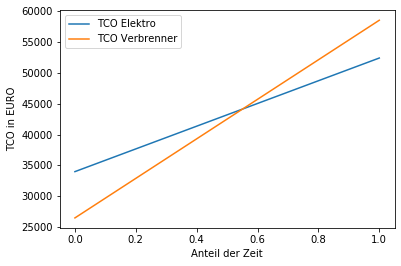

In [127]:
plt.plot(werte)
plt.legend(('TCO Elektro','TCO Verbrenner'))
plt.xlabel('Anteil der Zeit')
plt.ylabel('TCO in EURO')
plt.show()

**Abspeichern der TCO-Liste in einer CSV-Datei:**

In [128]:
liste.to_csv("Parameter-Liste_TCO.csv", sep=';', encoding='utf-8')

## Diskussion

Wie in der Grafik erkennbar, sind die Gesamtkosten beim Elektroauto nach ca. 5,5 Jahren niedrier als die Gesamtkosten. Das beduetet, selbst bei den kleinen E-Autos und einer jährlichen Kilometerleistung von nur 15.000 km ist die Elektor-Variante langfristig günstiger als die Verbrennerversion. 



**ACHTUNG!**

Bei individuell eingestellten Parametern stimmen die Ergebnisse nicht mehr mit den oben beschriebenen Ergebnissen überein!


**Fazit:**

Dieses Python-Tool kann und wird absofort verwendet, wenn es darum geht die Gesamtkosten von zwei vergleichbaren Autos darzustellen. 

## Quellenverzeichnis

https://de.wikipedia.org/wiki/Motorenbenzin
